In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Reshape,\
                                                 Activation, Conv2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, \
                                        regularizers, metrics
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
b_size = 5
train_datagen = ImageDataGenerator(rescale=1./255,
                                              horizontal_flip=True,
                                               #수평 대칭 이미지를 50% 확률로 만듬
                                              width_shift_range=0.1,
                                              # 전체 크기의 10% 범위에서 좌우로 이동
                                               height_shift_range=0.1,
                                   fill_mode='nearest'
                                              )


In [4]:
train_generator = train_datagen.flow_from_directory(
                                                                'train', # 폴더명
                                                                 target_size=(150,150), 
                                                                batch_size=b_size,
                                                                class_mode='binary')
# binary로 변환

Found 160 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
                                                                'test', # 폴더명
                                                                 target_size=(150,150), 
                                                                batch_size=b_size,
                                                                class_mode='binary')

Found 120 images belonging to 2 classes.


In [9]:
print(len(train_generator))

32


In [10]:
print(len(test_generator))

24


In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [13]:
model.compile(loss='sparse_categorical_crossentropy', \
              # 확률 가장높은게 1 나머진 0 -sparse_categorical
             optimizer=optimizers.Adam(learning_rate=0.0002), \
             metrics=['accuracy'])

In [14]:
steps_train = len(train_generator)
steps_test = len(test_generator)

In [15]:
history = model.fit(
       train_generator,
       steps_per_epoch=steps_train,
       epochs=20,
       validation_data=test_generator,
       validation_steps=steps_test )

Epoch 1/20
32/32 [==============================] - 8s 234ms/step - loss: 0.7123 - accuracy: 0.5063 - val_loss: 0.6786 - val_accuracy: 0.6083
Epoch 2/20
32/32 [==============================] - 6s 177ms/step - loss: 0.7066 - accuracy: 0.5375 - val_loss: 0.6796 - val_accuracy: 0.5167
Epoch 3/20
32/32 [==============================] - 6s 179ms/step - loss: 0.6913 - accuracy: 0.5625 - val_loss: 0.6779 - val_accuracy: 0.7667
Epoch 4/20
32/32 [==============================] - 7s 224ms/step - loss: 0.6790 - accuracy: 0.6500 - val_loss: 0.6586 - val_accuracy: 0.5750
Epoch 5/20
32/32 [==============================] - 6s 190ms/step - loss: 0.6484 - accuracy: 0.6375 - val_loss: 0.6212 - val_accuracy: 0.5917
Epoch 6/20
32/32 [==============================] - 7s 205ms/step - loss: 0.6453 - accuracy: 0.6187 - val_loss: 0.6351 - val_accuracy: 0.6333
Epoch 7/20
32/32 [==============================] - 5s 171ms/step - loss: 0.6102 - accuracy: 0.6625 - val_loss: 0.6697 - val_accuracy: 0.5083
Epoch 

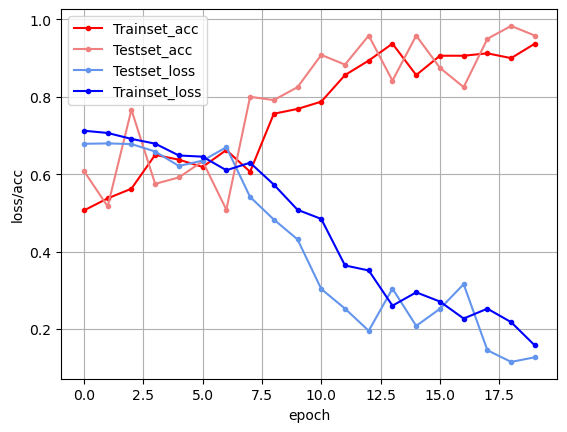

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c='red', label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c='lightcoral',\
         label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c='cornflowerblue', \
        label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper left')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()